<H1> Baseline Model (VGG 3 Blocks) </H1>

We will begin with three basic VGG CNN layers, each followed by a max pooling layer. Max pooling efficiently reduces parameter size while preserving information. As usual in deep learning models, we will flatten the intermediate layer outputs and pass them to a dense network. The dense network output will then go to a final output layer with 10 units, corresponding to our 10 categories. We will use Softmax as the final activation to select the most probable class from the 10 categories.

<H1> Loading Libraries </H1>

In [24]:
# keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# visuals
import matplotlib.pyplot as plt

<H1>Data Preparation:</H1>

The Cifar10 dataset is loaded and split into training and testing sets.
The images are reshaped to include three channels (color) and normalized to the range [0, 1].
Labels are one-hot encoded to match the output layer of the network.

In [29]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

<H1> Model Architecture: </H1>

Conv2D layers extract features from the images using 32 and 64 filters.
MaxPooling2D layers reduce the spatial dimensions.
Flatten layer converts the 2D feature maps to a 1D vector.
Dense layers perform classification, with the final layer using softmax activation to output probabilities for the 10 classes.

In [30]:
# declare some important variables
BATCH_SIZE = 64
EPOCHS = 50

In [31]:
# Define the CNN model
simple_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block 1
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape = (32,32,3)))
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 2
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 3
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# head of the model
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(128, activation='relu'))
simple_model.add(layers.Dense(10, activation='softmax'))

In [11]:
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

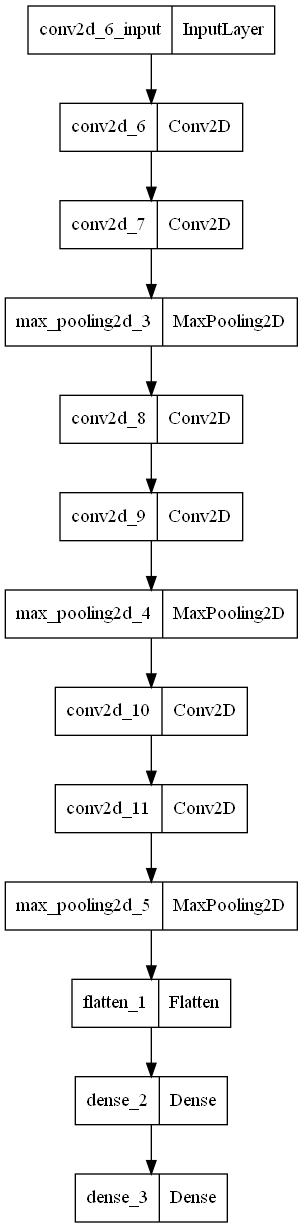

In [25]:
plot_model(simple_model)

<H1> Model Training: </H1>

The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
The fit function trains the model using the training data and evaluates it on the test data for EPOCHS epochs with a batch size of BATCH_SIZE

In [32]:
# Compile the model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_train = simple_model.fit(X_train, y_train, 
                            validation_data=(X_train, y_train), 
                            epochs=EPOCHS, 
                            batch_size=BATCH_SIZE
                            )


Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 1.5049 - accuracy: 0.4488 - val_loss: 1.1275 - val_accuracy: 0.5979
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.0163 - accuracy: 0.6411 - val_loss: 0.8749 - val_accuracy: 0.6895
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 0.8193 - accuracy: 0.7115 - val_loss: 0.7088 - val_accuracy: 0.7509
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 0.6888 - accuracy: 0.7581 - val_loss: 0.6354 - val_accuracy: 0.7717
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 0.5911 - accuracy: 0.7918 - val_loss: 0.4896 - val_accuracy: 0.8285
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.5166 - accuracy: 0.8176 - val_loss: 0.4614 - val_accuracy: 0.8385
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.4482 - accuracy: 0.8423 - val_loss: 0.4054 - val_accuracy: 0.8589
Epoch 

In [33]:
def myplot( hist ):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("Accuracy by VGG3 on CIFAR-10 Data")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss by VGG3 on CIFAR-10 Data')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.show()

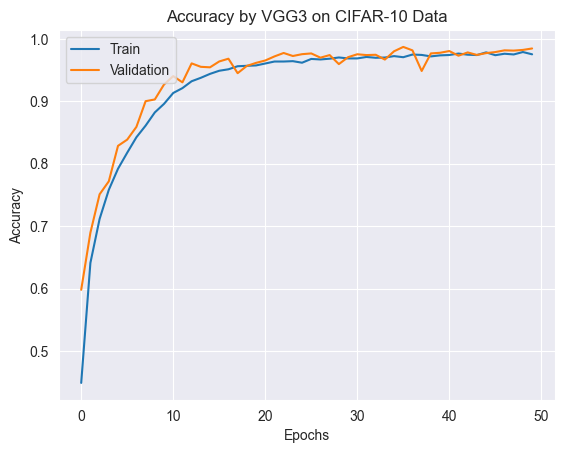

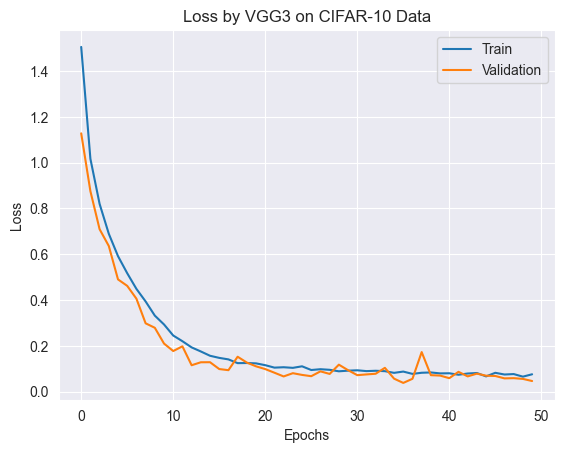

In [34]:
myplot(hist_train)

In [35]:
simple_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5955 - accuracy: 0.7783


[1.595543384552002, 0.7782999873161316]

<H1> Save the train model </H1>

In [36]:
simple_model.save('C:/home/azizi/upi/models/simple_model_base.h5')